Columns used for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


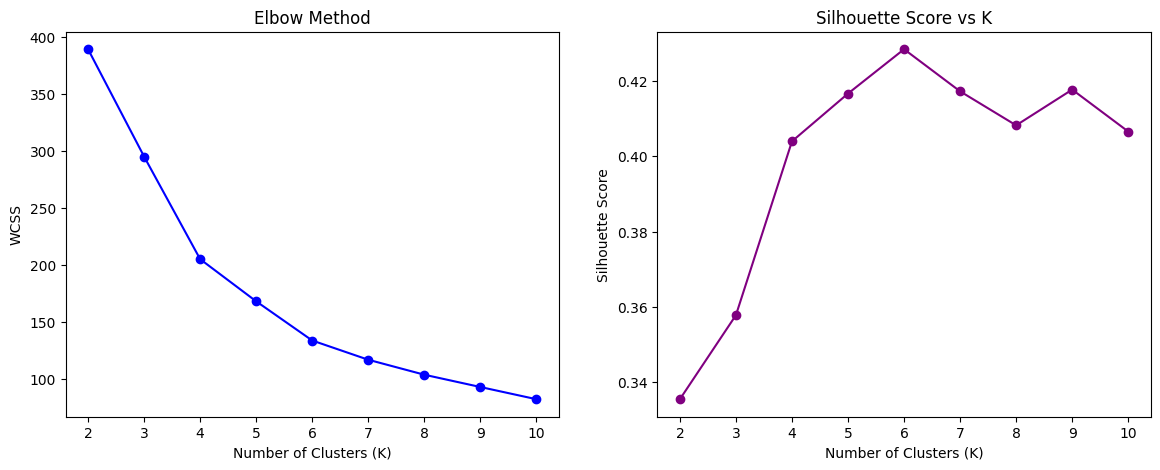

Optimal number of clusters based on Silhouette Score: 6


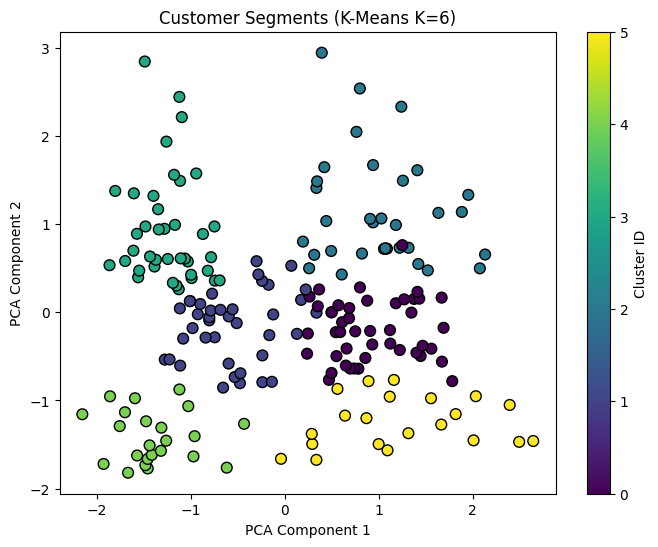

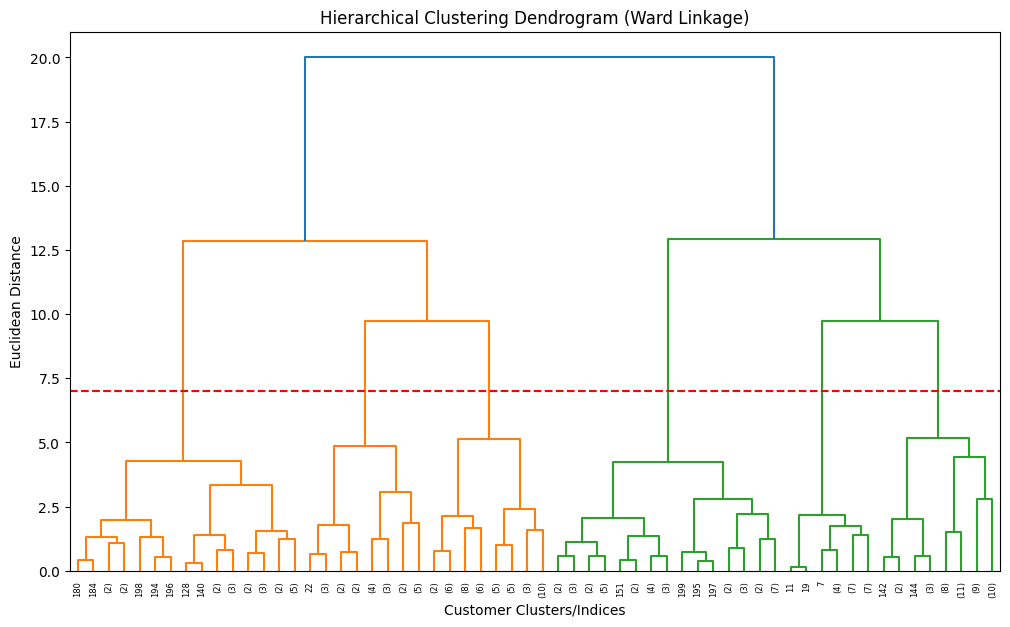

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load Dataset directly for Google Colab
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
df = pd.read_csv(url)

# 2. Preprocessing
df.columns = df.columns.str.strip()

# FIX: The dataset uses 'Genre' instead of 'Gender'
# We drop non-numeric columns and ID for clustering
cols_to_drop = []
if 'CustomerID' in df.columns: cols_to_drop.append('CustomerID')
if 'Genre' in df.columns: cols_to_drop.append('Genre')
if 'Gender' in df.columns: cols_to_drop.append('Gender')

df_numeric = df.drop(columns=cols_to_drop)

# Handle missing values
df_numeric = df_numeric.fillna(df_numeric.mean())

print("Columns used for clustering:", df_numeric.columns.tolist())
print(df_numeric.head())

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# 4. Finding Optimal K (Elbow Method & Silhouette Score)
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plotting Elbow and Silhouette side-by-side

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

# 5. Final K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# 6. PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=60, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Customer Segments (K-Means K={optimal_k})")
plt.colorbar(scatter, label="Cluster ID")
plt.show()

# 7. Hierarchical Clustering (Dendrogram)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Customer Clusters/Indices")
plt.ylabel("Euclidean Distance")
plt.axhline(y=7, color='r', linestyle='--') # Visual threshold
plt.show()

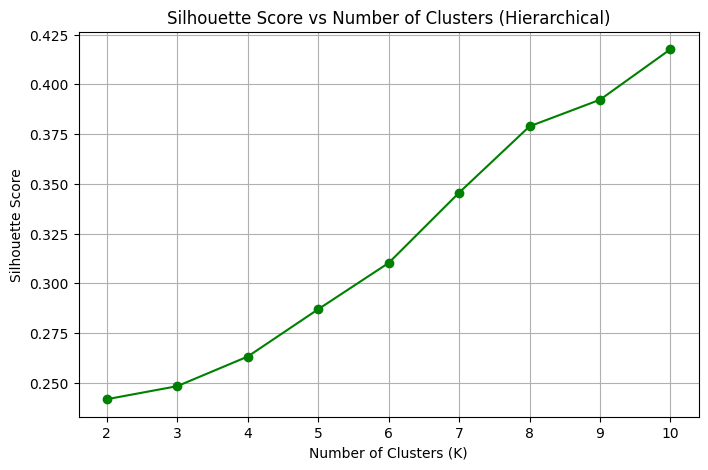

Best Number of Clusters: 10
Best Silhouette Score: 0.4176


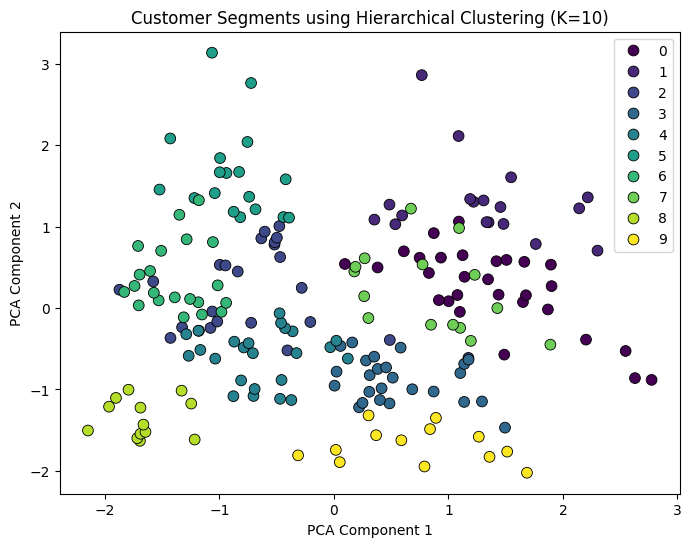

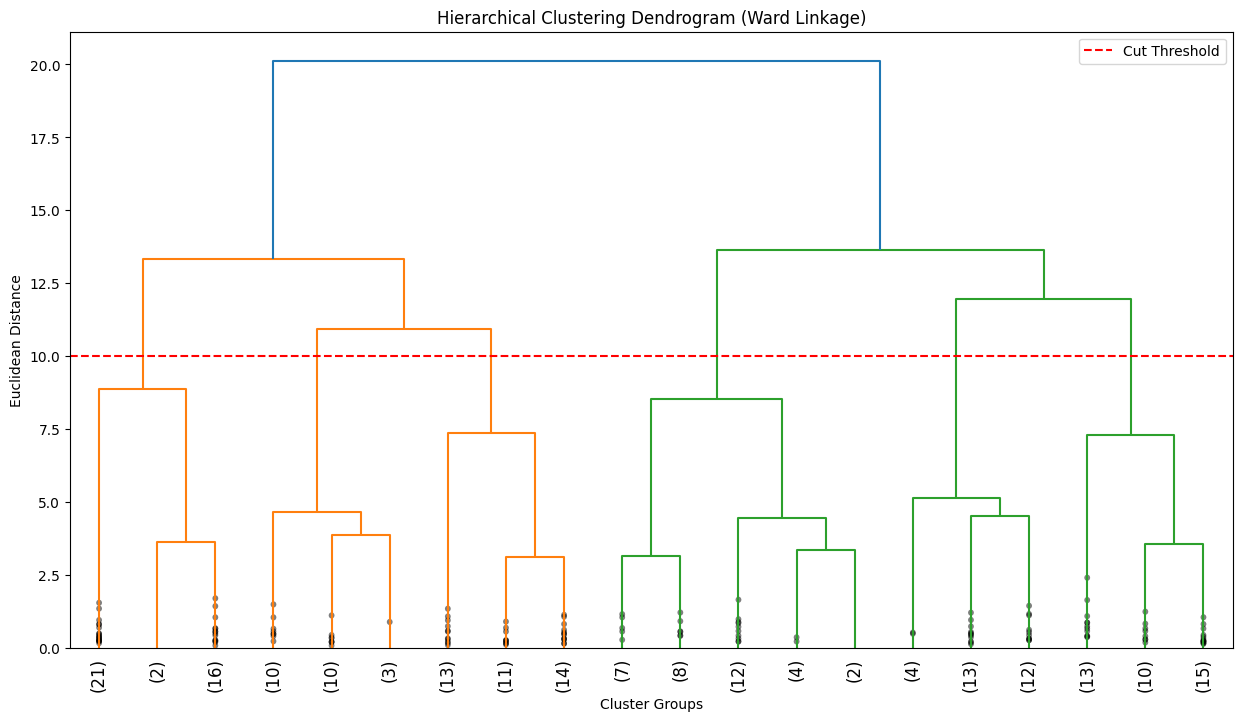

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load Dataset directly for Google Colab
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
df = pd.read_csv(url)

# 2. Preprocessing
# Drop ID and encode Gender (0 for Female, 1 for Male)
df['Gender'] = df['Genre'].map({'Male': 1, 'Female': 0})
df = df.drop(columns=['CustomerID', 'Genre'], errors='ignore')

# Handle missing values (though this dataset is usually clean)
df.fillna(df.mean(), inplace=True)

# Dataset has 200 rows, so we use all of them instead of sampling 600
df_sample = df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

# 3. Finding Best K for Hierarchical Clustering
cluster_range = range(2, 11)
silhouette_scores = []

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette vs K

plt.figure(figsize=(8,5))
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (Hierarchical)")
plt.grid(True)
plt.show()

best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Best Number of Clusters: {best_k}")
print(f"Best Silhouette Score: {round(max(silhouette_scores), 4)}")

# 4. Final Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
final_labels = hc.fit_predict(X_scaled)

# 5. PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=final_labels,
    palette='viridis',
    s=60,
    edgecolor='black',
    legend='full'
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Customer Segments using Hierarchical Clustering (K={best_k})")
plt.show()

# 6. Dendrogram (Full Dataset)
linked = linkage(X_scaled, method='ward')


plt.figure(figsize=(15,8))
dendrogram(
    linked,
    truncate_mode='lastp', # Shows only the last p merged clusters
    p=20,                  # Better readability for 200 samples
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True
)
plt.axhline(y=10, color='red', linestyle='--', label='Cut Threshold')
plt.xlabel("Cluster Groups")
plt.ylabel("Euclidean Distance")
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.legend()
plt.show()